<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward non-technical executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a state of your choice.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
ls = [7, 2, 4, 3, 9, 12, 10, 2]
ls_mean = sum(ls)/len(ls)
ls_mean

6.125

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:

def get_std_dev(ls):
    n = len(ls)
    mean = sum(ls) / n
    var = sum((x - mean)**2 for x in ls) / n
    std_dev = var ** 0.5
    return std_dev

get_std_dev(ls)

3.6550478793033614

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:

def percent(x):
    deci = float(x[:-1]) / 100
    print(deci)
    
percent('50%')

0.5


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
%matplotlib inline

## Data Import and Cleaning

### 2017 Data import and cleaning


In [5]:
# Load sat_2017 & act_2017 datasets
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

In [6]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [7]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [8]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [9]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


The SAT dataset contains the average SAT scores of students by state. All 51 states (Washington DC became a state in 2020) of the US are represented in the data, excluding non-state territories such as Puerto Rico and Virgin Islands. This particular dataset includes the two compulsory sections of the SAT, which are Math section and the Evidence Based Reading and Writing section. The dataset also has a record of average total scores by state, and participation rate by state.

The ACT dataset similarly consists of the average ACT scores of students by state, includes the average English, Math, Reading, Science and Composite of students. Unlike the SAT dataset, the ACT dataset includes a row with national averages. There are four columns indicating English, Math, Reading and Science scores. The ACT data also includes participation rates by state.

It's worth noting that the average total scores for both tests are derived from subject scores listed within the dataset, and do not include additional subjects outside the dataset.

Overall, the data looks complete, given that the number of rows for the ACT and SAT match the number of states in the US (the ACT dataset has an extra row that cen be removed later). While the data may be complete, the multiple outliers in the data (i.e. abnormally low minimum scores) suggest that further cleaning is needed.

The minimum possible value for each SAT subject is 200, with a maximum of 800. Correspondingly, SAT total scores can range from 400 to 1600.

Each ACT subject has a minimum score of 1, and a maximum score of 36. The total score for a student is calculated by adding these subjects together, and dividing by the total number of subjects (4).

With this in mind, there are a few areas that we need to look into --

SAT 2017 dataset:

- Abnormally low average Math Score of 52 when minimum is 200
- The datatype of the participation rates column is a string `object` instead of an `int` or `float`

ACT 2017 dataset:
- Abnormally low average score of 2.3 (Maryland)
- Extra row within data
- Composite score column is a string `object` when it should be a `float` -- this is due to the '20.2x' string in Wyoming column

In [10]:
# Fixing composite score for Wyoming
act_2017 = act_2017.replace('20.2x', 20.2)

In [11]:
# Fixing SAT Math score for Maryland
sat_2017.loc[20, 'Math'] = 520

In [12]:
# Fixing ACT Science score for Maryland
act_2017.loc[20, 'Science'] = 23.0

In [13]:
# Checking data types for ACT 2017 dataset
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [14]:
# Checking data types for SAT 2017 dataset
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Composite score is still an `object`: need to convert values `int` or `float` 

In [15]:
# We'll write a function to change our participation column to numeric
def participation_to_num(df):
    for col in df.columns:
        if 'percentage' in col.lower() or 'participation' in col.lower():
            df[col] = df[col].replace('%','', regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')
                        
participation_to_num(act_2017)
participation_to_num(sat_2017)

In [16]:
# Replace object values in composite column with float values 
act_2017['Composite'] = list(map(lambda x: float(x), act_2017['Composite']))

In [17]:
# Checking column types
display(type(act_2017['Composite'].iloc[0]), 
type(act_2017['Participation'].iloc[0]), 
type(sat_2017['Participation'].iloc[0]))

numpy.float64

numpy.int64

numpy.int64

Renaming columns:

In [18]:
def update_cols(df,prefix):
    # Rename columns using list comprehension
    df.columns = [x.lower().replace('evidence-based reading and writing','ebrw').replace('participation rate','rate') \
                           .replace('participation', 'rate').replace('average', '').replace('score', '') \
                           .replace('composite', 'total').replace(' ','').replace('percentage', 'rate') \
                  for x in df.columns]
   
 
    # Add prefix
    df.columns = [prefix + x if x !='state' else x for x in df.columns]
    return df

In [19]:
update_cols(act_2017, 'act_2017_');
update_cols(sat_2017, 'sat_2017_');

In [20]:
# Checking column names
act_2017.columns

Index(['state', 'act_2017_rate', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_total'],
      dtype='object')

In [21]:
sat_2017.columns

Index(['state', 'sat_2017_rate', 'sat_2017_ebrw', 'sat_2017_math',
       'sat_2017_total'],
      dtype='object')

In [22]:
display(sat_2017.info())
display(act_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           51 non-null     object
 1   sat_2017_rate   51 non-null     int64 
 2   sat_2017_ebrw   51 non-null     int64 
 3   sat_2017_math   51 non-null     int64 
 4   sat_2017_total  51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             52 non-null     object 
 1   act_2017_rate     52 non-null     int64  
 2   act_2017_english  52 non-null     float64
 3   act_2017_math     52 non-null     float64
 4   act_2017_reading  52 non-null     float64
 5   act_2017_science  52 non-null     float64
 6   act_2017_total    52 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


None

##### Note:
- ACT dataset has an additional row for national averages which will be removed for purposes of comparison with the SAT dataset

In [23]:
# Dropping national row
act_2017.drop(act_2017[act_2017['state'] == 'National'].index, inplace=True)
act_2017.reset_index(drop=True, inplace=True)

In [24]:
display(sat_2017.info())
display(act_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           51 non-null     object
 1   sat_2017_rate   51 non-null     int64 
 2   sat_2017_ebrw   51 non-null     int64 
 3   sat_2017_math   51 non-null     int64 
 4   sat_2017_total  51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             51 non-null     object 
 1   act_2017_rate     51 non-null     int64  
 2   act_2017_english  51 non-null     float64
 3   act_2017_math     51 non-null     float64
 4   act_2017_reading  51 non-null     float64
 5   act_2017_science  51 non-null     float64
 6   act_2017_total    51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


None

#### Merging dataframes

In [25]:
# Set index as state in preparation for merging
act_2017.set_index('state', inplace=True)
sat_2017.set_index('state', inplace=True);

In [26]:
sat_2017.index = sat_2017.index.str.lower()
act_2017.index = act_2017.index.str.lower()

In [27]:
# Joining ACT and SAT 2017 datasets
combined_2017 = act_2017.join(sat_2017)
combined_2017.head();

In [28]:
# Checking joined dataframe

combined_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   act_2017_rate     51 non-null     int64  
 1   act_2017_english  51 non-null     float64
 2   act_2017_math     51 non-null     float64
 3   act_2017_reading  51 non-null     float64
 4   act_2017_science  51 non-null     float64
 5   act_2017_total    51 non-null     float64
 6   sat_2017_rate     51 non-null     int64  
 7   sat_2017_ebrw     51 non-null     int64  
 8   sat_2017_math     51 non-null     int64  
 9   sat_2017_total    51 non-null     int64  
dtypes: float64(5), int64(5)
memory usage: 6.4+ KB


In [29]:
combined_2017.to_csv('../data/combined_2017.csv', index=False)

2017 data has been cleaned and exported. Similar steps will be done with the 2018 and 2019 data

### 2018 Data import and cleaning

In [30]:
# Import 2018 SAT and ACT data as dataframes
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [31]:
display(sat_2018.head())
display(act_2018.head())

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [32]:
# Changing participation rates to numeric
participation_to_num(act_2018)
participation_to_num(sat_2018)

In [33]:
update_cols(act_2018, 'act_2018_')
update_cols(sat_2018, 'sat_2018_');

In [34]:
act_2018.head()

,state,act_2018_rate,act_2018_total
0,Alabama,100,19.1
1,Alaska,33,20.8
2,Arizona,66,19.2
3,Arkansas,100,19.4
4,California,27,22.7


In [35]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           52 non-null     object 
 1   act_2018_rate   52 non-null     int64  
 2   act_2018_total  52 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [36]:
act_2018.drop([20], inplace = True)

In [37]:
# Set index as state to facillitate merging and access to data
act_2018.set_index('state', inplace=True)
sat_2018.set_index('state', inplace=True)

In [38]:
sat_2018.index = sat_2018.index.str.lower()
act_2018.index = act_2018.index.str.lower()

In [39]:
display(sat_2018.info())
display(act_2018.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sat_2018_rate   51 non-null     int64
 1   sat_2018_ebrw   51 non-null     int64
 2   sat_2018_math   51 non-null     int64
 3   sat_2018_total  51 non-null     int64
dtypes: int64(4)
memory usage: 2.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   act_2018_rate   51 non-null     int64  
 1   act_2018_total  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2+ KB


None

In [40]:
# Combine 2018 data into a dataframe
combined_2018 = act_2018.join(sat_2018)
combined_2018.head()

,act_2018_rate,act_2018_total,sat_2018_rate,sat_2018_ebrw,sat_2018_math,sat_2018_total
state,,,,,,
alabama,100,19.1,6,595,571,1166
alaska,33,20.8,43,562,544,1106
arizona,66,19.2,29,577,572,1149
arkansas,100,19.4,5,592,576,1169
california,27,22.7,60,540,536,1076


#### Note:
There were no individual test scores provided for the 2018 ACT dataset. However, the 2018 SAT individual scores can still be kept for a year-on-year comparison (if needed later).

In [41]:
# Checking our dtypes
combined_2018.dtypes

act_2018_rate       int64
act_2018_total    float64
sat_2018_rate       int64
sat_2018_ebrw       int64
sat_2018_math       int64
sat_2018_total      int64
dtype: object

In [42]:
combined_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   act_2018_rate   51 non-null     int64  
 1   act_2018_total  51 non-null     float64
 2   sat_2018_rate   51 non-null     int64  
 3   sat_2018_ebrw   51 non-null     int64  
 4   sat_2018_math   51 non-null     int64  
 5   sat_2018_total  51 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 4.8+ KB


### 2019 Data import and cleaning

In [43]:
# Import 2018 SAT and ACT data as dataframes
sat_2019 = pd.read_csv('../data/sat_2019.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')

In [44]:
display(sat_2019.head())
display(act_2019.head())

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [45]:
# Changing participation rates to numeric
participation_to_num(act_2019)
participation_to_num(sat_2019)

In [46]:
update_cols(act_2019, 'act_2019_')
update_cols(sat_2019, 'sat_2019_');

In [47]:
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           53 non-null     object 
 1   sat_2019_rate   51 non-null     float64
 2   sat_2019_ebrw   53 non-null     int64  
 3   sat_2019_math   53 non-null     int64  
 4   sat_2019_total  53 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB


#### Note:
- SAT participation rate
    - Extract out the 2 null values
    - Remove null values (as there are only 2 and would not significantly impact the data)
    


In [48]:
display(sat_2019[sat_2019['sat_2019_rate'].isnull()])

,state,sat_2019_rate,sat_2019_ebrw,sat_2019_math,sat_2019_total
39,Puerto Rico,NaN,483,462,944
47,Virgin Islands,NaN,490,445,935


In [49]:
# Dropping rows with missing columns in sat_2019 as Puerto Rico and Virgin Islands are not states
sat_2019.dropna(inplace = True)

#### Note:
- There were no individual test scores provided for the 2019 ACT dataset. However, the 2019 SAT individual scores can still be kept for a year-on-year comparison (if needed later).

In [50]:
# Dropping national row
act_2019.drop(act_2019[act_2019['state'] == 'National'].index, inplace=True)
act_2019.reset_index(drop=True, inplace=True)

In [51]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           51 non-null     object 
 1   act_2019_rate   51 non-null     int64  
 2   act_2019_total  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [52]:
# Set index as state to facillitate merging and access to data
act_2019.set_index('state', inplace=True)
sat_2019.set_index('state', inplace=True)

In [53]:
sat_2019.index = sat_2019.index.str.lower()
act_2019.index = act_2019.index.str.lower()

In [54]:
display(sat_2019.info())
display(act_2019.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sat_2019_rate   51 non-null     float64
 1   sat_2019_ebrw   51 non-null     int64  
 2   sat_2019_math   51 non-null     int64  
 3   sat_2019_total  51 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   act_2019_rate   51 non-null     int64  
 1   act_2019_total  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2+ KB


None

In [55]:
# Combine 2019 data into a dataframe
combined_2019 = act_2019.join(sat_2019)
combined_2019.head()

,act_2019_rate,act_2019_total,sat_2019_rate,sat_2019_ebrw,sat_2019_math,sat_2019_total
state,,,,,,
alabama,100,18.9,7.0,583,560,1143
alaska,38,20.1,41.0,556,541,1097
arizona,73,19.0,31.0,569,565,1134
arkansas,100,19.3,6.0,582,559,1141
california,23,22.6,63.0,534,531,1065


In [56]:
# Checking our dtypes
combined_2019.dtypes

act_2019_rate       int64
act_2019_total    float64
sat_2019_rate     float64
sat_2019_ebrw       int64
sat_2019_math       int64
sat_2019_total      int64
dtype: object

Data cleaning for all the 3 years worth of data is done.

##### Things to be done:
- Combine our 2017- 2019 data into a single dataframe here by joining on state names.

This combined dataframe will be used for the remainder of the project.

In [57]:
final = (combined_2017.join(combined_2018)).join(combined_2019)

In [58]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   act_2017_rate     51 non-null     int64  
 1   act_2017_english  51 non-null     float64
 2   act_2017_math     51 non-null     float64
 3   act_2017_reading  51 non-null     float64
 4   act_2017_science  51 non-null     float64
 5   act_2017_total    51 non-null     float64
 6   sat_2017_rate     51 non-null     int64  
 7   sat_2017_ebrw     51 non-null     int64  
 8   sat_2017_math     51 non-null     int64  
 9   sat_2017_total    51 non-null     int64  
 10  act_2018_rate     51 non-null     int64  
 11  act_2018_total    51 non-null     float64
 12  sat_2018_rate     51 non-null     int64  
 13  sat_2018_ebrw     51 non-null     int64  
 14  sat_2018_math     51 non-null     int64  
 15  sat_2018_total    51 non-null     int64  
 16  act_2019_rate     51 non-null     int64 

In [59]:
final.head()

,act_2017_rate,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_total,sat_2017_rate,sat_2017_ebrw,sat_2017_math,sat_2017_total,...,sat_2018_rate,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2019_rate,act_2019_total,sat_2019_rate,sat_2019_ebrw,sat_2019_math,sat_2019_total
state,,,,,,,,,,,,,,,,,,,,,
alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165,...,6,595,571,1166,100,18.9,7.0,583,560,1143
alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080,...,43,562,544,1106,38,20.1,41.0,556,541,1097
arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116,...,29,577,572,1149,73,19.0,31.0,569,565,1134
arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208,...,5,592,576,1169,100,19.3,6.0,582,559,1141
california,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055,...,60,540,536,1076,23,22.6,63.0,534,531,1065


In [60]:
final.to_csv('../data/final.csv')

### **Data Dictionary:** 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|`object`|act_csv/sat_csv|Names of all US states|
|act_2017_rate|`int`|ACT 2017| The rate of 2017 graduating seniors who took the ACT as a percentage out of 100|
|act_2017_english|`float`|ACT 2017|Average english score on the ACT in 2017 (Min: 1, Max:36)|
|act_2017_math|`float`|ACT 2017|Average math score on the ACT in 2017 (Min: 1, Max:36)|
|act_2017_reading|`float`|ACT 2017|Average reading score on the ACT in 2017 (Min: 1, Max:36)|
|act_2017_science|`float`|ACT 2017|Average science score on the ACT in 2017 (Min: 1, Max:36)|
|act_2017_total|`float`|ACT 2017|Average total score derived as a composite of Math, Reading, English and Science scores on the ACT in 2017 (Min: 1, Max:36)|
|sat_2017_rate|`int`|SAT 2017| The rate of 2017 graduating seniors who took the SAT as a percentage out of 100|
|sat_2017_ebrw|`int`|SAT 2017|Average score for reading and writing on the SAT in 2017 (Min: 200, Max: 800)|
|sat_2017_math|`int`|SAT 2017|Average score for math on the SAT in 2017 (Min: 200, Max: 800)|
|sat_2017_total|`int`|SAT 2017|Average total score derived as a composite of Math and Reading and Writing scores on the SAT in 2017 (Min: 400, Max:1600)|
|act_2018_rate|`int`|ACT 2018| The rate of 2018 graduating seniors who took the ACT as a percentage out of 100|
|act_2018_total|`float`|ACT 2018|Average total score derived as a composite of Math, Reading, English and Science scores on the ACT in 2018 (Min: 1, Max:36)|
|sat_2018_rate|`int`|SAT 2018| The rate of 2018 graduating seniors who took the SAT as a percentage out of 100|
|sat_2018_ebrw|`int`|SAT 2018|Average score for reading and writing on the SAT in 2018 (Min: 200, Max: 800)|
|sat_2018_math|`int`|SAT 2018|Average score for math on the SAT in 2018 (Min: 200, Max: 800)|
|sat_2018_total|`int`|SAT 2018|Average total score derived as a composite of Math and Reading and Writing scores on the SAT in 2018 (Min: 400, Max:1600)|
|act_2019_rate|`int`|ACT 2019| The rate of 2019 graduating seniors who took the ACT as a percentage out of 100|
|act_2019_total|`float`|ACT 2019|Average total score derived as a composite of Math, Reading, English and Science scores on the ACT in 2019 (Min: 1, Max:36)|
|sat_2019_rate|`float`|SAT 2019| The rate of 2019 graduating seniors who took the SAT as a percentage out of 100|
|sat_2019_ebrw|`int`|SAT 2019|Average score for reading and writing on the SAT in 2019 (Min: 200, Max: 800)|
|sat_2019_math|`int`|SAT 2019|Average score for math on the SAT in 2019 (Min: 200, Max: 800)|
|sat_2019_total|`int`|SAT 2019|Average total score derived as a composite of Math and Reading and Writing scores on the SAT in 2019 (Min: 400, Max:1600)|



## Exploratory Data Analysis


In [61]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act_2017_rate,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.027451,3.172260,2.3,19.90,21.3,22.65,24.9
act_2017_total,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_rate,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.803922,47.180513,468.0,522.00,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


**Exposing Selection Bias**

In [62]:
# Function to display top 5 and bottom 5 of dataframe
def display_n(df,n): 
    with pd.option_context('display.max_rows',n*2):
        display(df)

In [63]:
# Lowest and highest SAT scores for 2017
display_n(final[['sat_2017_total', 'sat_2017_rate']].sort_values('sat_2017_total'),5)

# Lowest and highest SAT scores for 2018
display_n(final[['sat_2018_total', 'sat_2018_rate']].sort_values('sat_2018_total'),5)

# Lowest and highest SAT scores for 2019
display_n(final[['sat_2019_total', 'sat_2019_rate']].sort_values('sat_2019_total'),5)

# Lowest and highest ACT scores in 2017
display_n(final[['act_2017_total', 'act_2017_rate']].sort_values('act_2017_total'),5)

# Lowest and highest ACT scores in 2018
display_n(final[['act_2018_total', 'act_2018_rate']].sort_values('act_2018_total'), 5)

# Lowest and highest ACT scores in 2019
display_n(final[['act_2019_total', 'act_2019_rate']].sort_values('act_2019_total'), 5)

,sat_2017_total,sat_2017_rate
state,,
district of columbia,950,100
delaware,996,100
idaho,1005,93
michigan,1005,100
maine,1012,95
...,...,...
kansas,1260,4
missouri,1271,3
iowa,1275,2


,sat_2018_total,sat_2018_rate
state,,
district of columbia,977,92
delaware,998,100
west virginia,999,28
idaho,1001,100
utah,1010,4
...,...,...
kansas,1265,4
iowa,1265,3
north dakota,1283,2


,sat_2019_total,sat_2019_rate
state,,
west virginia,943,99.0
oklahoma,963,22.0
district of columbia,975,94.0
delaware,985,100.0
idaho,993,100.0
...,...,...
nebraska,1260,3.0
north dakota,1263,2.0
south dakota,1268,3.0


,act_2017_total,act_2017_rate
state,,
nevada,17.8,100
mississippi,18.6,100
south carolina,18.7,100
hawaii,19.0,90
north carolina,19.1,100
...,...,...
district of columbia,24.2,32
maine,24.3,8
connecticut,25.2,31


,act_2018_total,act_2018_rate
state,,
nevada,17.7,100
south carolina,18.3,100
mississippi,18.6,100
hawaii,18.9,89
alabama,19.1,100
...,...,...
michigan,24.2,22
new york,24.5,27
new hampshire,25.1,16


,act_2019_total,act_2019_rate
state,,
nevada,17.9,100
mississippi,18.4,100
south carolina,18.8,78
louisiana,18.8,100
alabama,18.9,100
...,...,...
new york,24.5,22
rhode island,24.7,12
new hampshire,25.0,14


In [64]:
# 4 states with SAT participation rates of 100% in 2017
sat_2017[sat_2017['sat_2017_rate'] == 100].index

Index(['connecticut', 'delaware', 'district of columbia', 'michigan'], dtype='object', name='state')

In [65]:
# 17 states with ACT participation rates of 100% in 2017
act_2017[act_2017['act_2017_rate'] == 100].index, (len(act_2017[act_2017['act_2017_rate'] == 100].index))

(Index(['alabama', 'arkansas', 'colorado', 'kentucky', 'louisiana', 'minnesota',
        'mississippi', 'missouri', 'montana', 'nevada', 'north carolina',
        'oklahoma', 'south carolina', 'tennessee', 'utah', 'wisconsin',
        'wyoming'],
       dtype='object', name='state'),
 17)

In [66]:
# 5 states with SAT participation rates of 100% in 2018
sat_2018[sat_2018['sat_2018_rate'] == 100].index

Index(['colorado', 'connecticut', 'delaware', 'idaho', 'michigan'], dtype='object', name='state')

In [67]:
# 17 states with ACT participation rates of 100% in 2018
act_2018[act_2018['act_2018_rate'] == 100].index, (len(act_2018[act_2018['act_2018_rate'] == 100].index))

(Index(['alabama', 'arkansas', 'kentucky', 'louisiana', 'mississippi',
        'missouri', 'montana', 'nebraska', 'nevada', 'north carolina', 'ohio',
        'oklahoma', 'south carolina', 'tennessee', 'utah', 'wisconsin',
        'wyoming'],
       dtype='object', name='state'),
 17)

In [68]:
# 8 states with SAT participation rates of 100% in 2019
sat_2019[sat_2019['sat_2019_rate'] == 100].index

Index(['colorado', 'connecticut', 'delaware', 'florida', 'idaho', 'illinois',
       'michigan', 'rhode island'],
      dtype='object', name='state')

In [69]:
# 15 states with ACT participation rates of 100% in 2019
act_2019[act_2019['act_2019_rate'] == 100].index, (len(act_2019[act_2019['act_2019_rate'] == 100].index))

(Index(['alabama', 'arkansas', 'kentucky', 'louisiana', 'mississippi',
        'montana', 'nebraska', 'nevada', 'north carolina', 'ohio', 'oklahoma',
        'tennessee', 'utah', 'wisconsin', 'wyoming'],
       dtype='object', name='state'),
 15)

When looking at the SAT, we can see that only 4 states had participation rates of 100% in 2017. This increased to 5 states in 2018 and 8 states in 2019. In comparison, the ACT had 17 states with participation rates of 100% in 2017, with this number remaining unchanged in 2018 but with a slight decrease to 15 states in 2019. We can infer from this that the ACT has a larger baseline following than the SAT.

Delving further into the data, we can also observe a noticeable trend where mid-western/rural states like Kansas and Iowa seem to do better on the SAT as compared to urban states like Washington DC or coastal states like Delware. The opposite pattern seems true, where urban states like New York and DC do better than rural states like South Carolina on the ACT. **However, if we look closer, this is actually a case of selection bias.**

Students taking the SAT in states with extremely ACT dominant states (like Kansas or Iowa) are likely planning to apply to out of state universities that require the SAT. The ability to afford both the SAT and relocate to a geographically distant location suggests that these students are likely to be of an above average socioeconomic status, which makes them unrepresentative of the average population of students taking the SAT.



In [70]:
# Create function to determine total percentage change over years
def abs_change(row):
    row = row.fillna(0)
    row = np.abs(row)
    row['total_pct_change'] = row.sum()
    return row

In [71]:
# Checking for rate change between 2017 and 2018 for SAT
sat_2017_rate = final[final['sat_2017_rate'] >= 99][['sat_2017_rate', 'sat_2018_rate']]
sat_2018_rate = final[final['sat_2018_rate'] >= 99][['sat_2017_rate', 'sat_2018_rate']]

# Concatenate dataframes with SAT participation percentages by state
sat_rate_df = pd.concat([sat_2017_rate, sat_2018_rate]).drop_duplicates()

# Create new column with percentage changes for SAT
sat_rate_df['total_pct_change'] = sat_rate_df.diff(axis=1).apply(abs_change, axis=1)['total_pct_change']
sat_rate_df[sat_rate_df['total_pct_change'] != 0.0].sort_values('total_pct_change', ascending=False)

,sat_2017_rate,sat_2018_rate,total_pct_change
state,,,
illinois,9,99,90.0
colorado,11,100,89.0
district of columbia,100,92,8.0
idaho,93,100,7.0
maine,95,99,4.0


In [72]:
# Checking for rate change between 2018 and 2019 for SAT
sat_2018_rate = final[final['sat_2018_rate'] >= 99][['sat_2018_rate', 'sat_2019_rate']]
sat_2019_rate = final[final['sat_2019_rate'] >= 99][['sat_2018_rate', 'sat_2019_rate']]

# Concatenate dataframes with SAT participation percentages by state
sat_rate_df = pd.concat([sat_2018_rate, sat_2019_rate]).drop_duplicates()

# Create new column with percentage changes for SAT
sat_rate_df['total_pct_change'] = sat_rate_df.diff(axis=1).apply(abs_change, axis=1)['total_pct_change']
sat_rate_df[sat_rate_df['total_pct_change'] != 0.0].sort_values('total_pct_change', ascending=False)

,sat_2018_rate,sat_2019_rate,total_pct_change
state,,,
west virginia,28,99.0,71.0
florida,56,100.0,44.0
rhode island,97,100.0,3.0
illinois,99,100.0,1.0


Colorado had a massive jump in their SAT participation rate from 11% in 2017 to 100% in 2018. Illinois also had a similar jump, from 9% in 2017 to 99% in 2018. In 2019, West Virginia also experienced a massive jump from 28% to 99%. This was also seen in Florida with an increase of 56% to 100%

**This was due to changes in state educational policy, which made the SAT compulsory in both Colorado and Illinois.**

DC's SAT participation rate dropped from 100% to 92% in 2018, while Idaho's SAT participation rate increased from 93% to 100% in 2018.

In [73]:
# Checking for rate change between 2017 and 2018 for ACT
act_2017_rate = final[final['act_2017_rate'] >= 99][['act_2017_rate', 'act_2018_rate']]
act_2018_rate = final[final['act_2018_rate'] >= 99][['act_2017_rate', 'act_2018_rate']]

# Concatenate dataframes with ACT participation percentages by state
act_rate_df = pd.concat([act_2017_rate, act_2018_rate]).drop_duplicates()

# Create new column with percentage changes for ACT
act_rate_df['total_pct_change'] = act_rate_df.diff(axis=1).apply(abs_change, axis=1)['total_pct_change']
act_rate_df[act_rate_df['total_pct_change'] != 0.0].sort_values('total_pct_change', ascending=False)

,act_2017_rate,act_2018_rate,total_pct_change
state,,,
colorado,100,30,70.0
ohio,75,100,25.0
nebraska,84,100,16.0
minnesota,100,99,1.0


In [74]:
# Checking for rate change between 2018 and 2019 for ACT
act_2018_rate = final[final['act_2018_rate'] >= 99][['act_2018_rate', 'act_2019_rate']]
act_2019_rate = final[final['act_2019_rate'] >= 99][['act_2018_rate', 'act_2019_rate']]

# Concatenate dataframes with ACT participation percentages by state
act_rate_df = pd.concat([act_2018_rate, act_2019_rate]).drop_duplicates()

# Create new column with percentage changes for ACT
act_rate_df['total_pct_change'] = act_rate_df.diff(axis=1).apply(abs_change, axis=1)['total_pct_change']
act_rate_df[act_rate_df['total_pct_change'] != 0.0].sort_values('total_pct_change', ascending=False)

,act_2018_rate,act_2019_rate,total_pct_change
state,,,
south carolina,100,78,22.0
missouri,100,82,18.0
minnesota,99,95,4.0


Colorado's ACT participation rate dropped massively from 2017 to 2018, while Nebraska and Ohio both increased their ACT participation rates from 2017 to 2018. In Nebraska, the ACT was made mandatory, leading to an increase in participation rate. In Ohio, standardized testing through the SAT or ACT also became mandatory -- despite being given a choice of which test to adopt, the majority of state districts (95%) chose the ACT over the SAT.

There were not any significant differences from 2018 to 2019 for the ACT dataset.

In [75]:
# Checking for cases where participation rates is greater than 50% for both tests in 2017
final[(final['sat_2017_rate'] > 50) & (final['act_2017_rate'] > 50)] \
        [['sat_2017_rate', 'act_2017_rate']] \
        .sort_values('sat_2017_rate')

,sat_2017_rate,act_2017_rate
state,,
hawaii,55,90
georgia,61,55
florida,83,73


In [76]:
# Checking for cases where participation rates is greater than 50% for both tests in 2018
final[(final['sat_2018_rate'] > 50) & (final['act_2018_rate'] > 50)] \
        [['sat_2018_rate', 'act_2018_rate']] \
        .sort_values(by='sat_2018_rate')

,sat_2018_rate,act_2018_rate
state,,
north carolina,52,100
south carolina,55,100
florida,56,66
hawaii,56,89
georgia,70,53


In [77]:
# Checking for cases where participation rates is greater than 50% for both tests in 2019
final[(final['sat_2019_rate'] > 50) & (final['act_2019_rate'] > 50)] \
        [['sat_2019_rate', 'act_2019_rate']] \
        .sort_values(by='sat_2019_rate')

,sat_2019_rate,act_2019_rate
state,,
north carolina,51.0,100
hawaii,54.0,80
south carolina,68.0,78
florida,100.0,54


**Flordia, Hawaii and Georgia had greater than 50% participation rates for both tests in 2017, 2018 and 2019.** Hawaii is interesting as the state is rather unique in terms of its location and demographics. The majority of Hawaiians [live in urban areas](https://files.hawaii.gov/dbedt/census/Census_2010/Other/2010urban_rural_report.pdf), which seems to be contrary to the trend of urban/coastal states favoring the SAT test.

Both North and South Carolina both have more than 50% participation for the ACT and SAT tests. Interestingly, North Carolina, South Carolina, Florida and Georgia are in close geographic proximity, and are all officially recognised as part of the [Southern US region](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf). These are generally considered to be highly conservative, republican states. We'll take a look later to see if political affiliation truly has anything to do with participation rates.



## Visualize the Data


In [78]:
# Create mask to prevent duplication of variables
mask = np.zeros(final.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

<AxesSubplot:title={'center':'Heatmap between numeric features of ACT and SAT in 2017 - 2019'}>

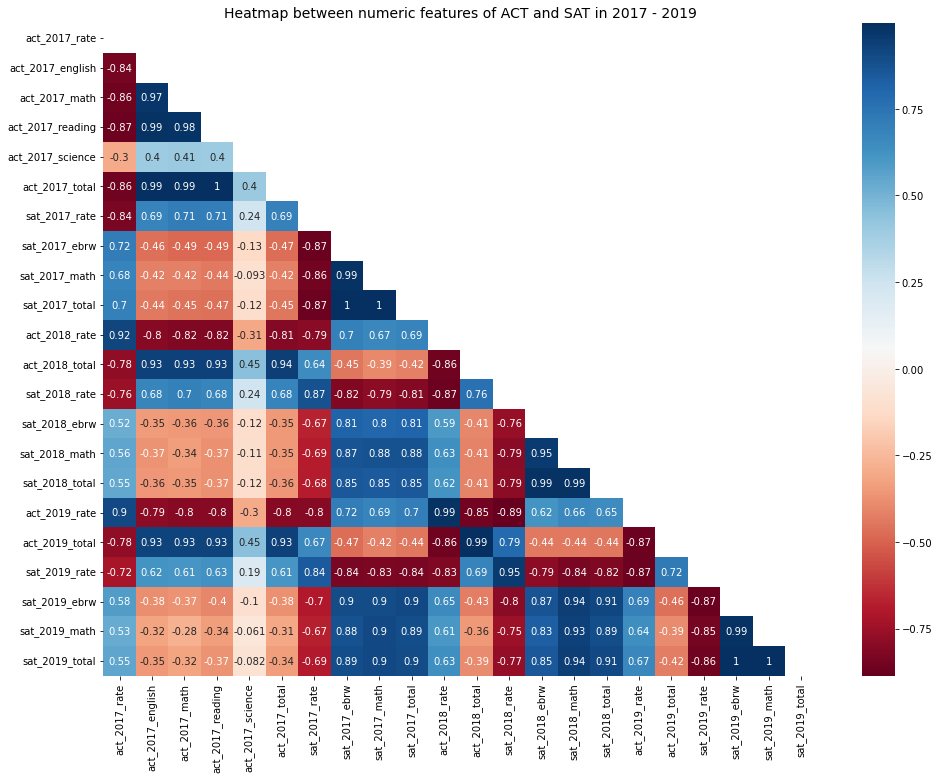

In [79]:
plt.figure(figsize=(16,12))
plt.title('Heatmap between numeric features of ACT and SAT in 2017 - 2019', fontsize=14)
sns.heatmap(final.corr(), cmap='RdBu', annot=True, mask=mask)


There are several patterns of interest here --

Firstly, we can see that **ACT participation has a strong negative correlation with ACT subject scores and overall ACT scores**. This means that states with higher ACT participation tend to have lower ACT scores, and vice versa for states with low ACT participation rates. This is mirrored in SAT participation rates, where there is an equally strong negative correlation between participation rates and SAT scores.

Secondly, **subject and test scores from a year are strongly correlated with the same subject and test scores in the following years**. This means that states that did well in the previous year, are likely to do well in the following year. This is unsurprising as states are unlikely to dramatically go up or down in test scores over a single year, due to policies and institutions (e.g. state education departments) that work to maintain consistent educational results year-on-year. Barring dramatic policy changes like switching from one test to another, states are likely to produce to the same results.

The **test scores / participation rates for each are also negatively correlated with the other test**. This shows that it's pretty rare for a student to take both tests.



In [80]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, sharex=False, kde=False, figsize=(14,7)):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize, sharex=sharex, sharey=True)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        # Calculate mean
        mean = np.mean(dataframe[list_of_columns[i]])
        ax[i].axvline(mean, ls='--', color='crimson')
        
        # Set color of graph according to test type
        if 'act_' in column:
            color = 'sandybrown'
        elif 'sat_' in column:
            color = 'skyblue'
        
        sns.histplot(data=dataframe, x=column, color=color, ax=ax[i], kde=kde, bins=8)
        ax[i].set_title(list_of_titles[i] + f' (Mean: {mean:.1f})')
        ax[i].set_xlabel(list_of_xlabels[i])
        # To prevent label duplication
        if i % 2 == 0:
            ax[i].set_ylabel('Number of States')
    
    fig.tight_layout(h_pad = 1.5, w_pad = 1.5)


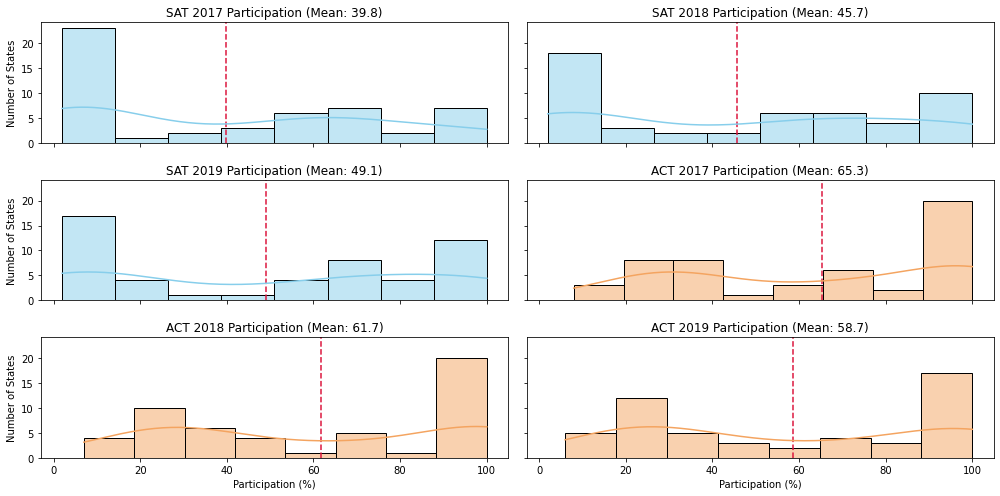

In [81]:
subplot_histograms(final, ['sat_2017_rate', 'sat_2018_rate', 'sat_2019_rate', 'act_2017_rate', 'act_2018_rate', 'act_2019_rate'], 
                   ['SAT 2017 Participation', 'SAT 2018 Participation', 'SAT 2019 Participation', 'ACT 2017 Participation', 'ACT 2018 Participation', 'ACT 2019 Participation'], 
                   ['Participation (%)', 'Participation (%)', 
                    'Participation (%)', 'Participation (%)', 'Participation (%)', 'Participation (%)'], sharex=True, kde=True)

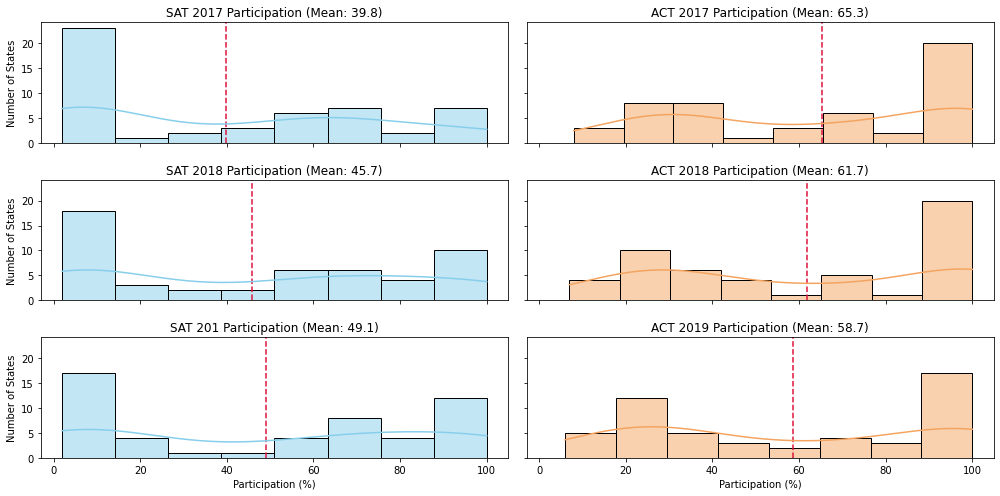

In [103]:
subplot_histograms(final, ['sat_2017_rate', 'act_2017_rate', 'sat_2018_rate', 'act_2018_rate', 'sat_2019_rate', 'act_2019_rate'], 
                   ['SAT 2017 Participation', 'ACT 2017 Participation', 'SAT 2018 Participation', 'ACT 2018 Participation', 'SAT 201 Participation', 'ACT 2019 Participation'], 
                   ['Participation (%)', 'Participation (%)', 
                    'Participation (%)', 'Participation (%)', 'Participation (%)', 'Participation (%)'], sharex=True, kde=True)

**Overall, we can see that the ACT has a larger baseline following than the SAT.** The SAT has a large number of states with an extremely low participation rate, while the ACT has a large number of states with a extremely high participation rate.

**In 2018, SAT participation increased by 5.9%, while ACT participation decreased by 3.7% on average.** This suggests that some states are beginning to adopt the SAT test over the ACT test, with some states moving away from standardized testing altogether. The number of states with a 90% - 100% participation for the SAT increased in 2018, while ACT participation rates for states in the same range remained consistent.



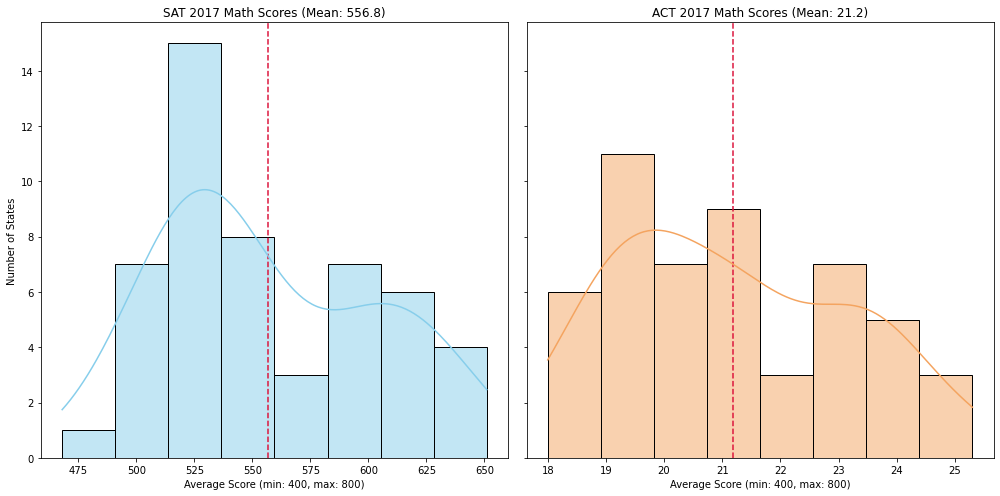

In [82]:
subplot_histograms(final, ['sat_2017_math', 'act_2017_math'], 
                   ['SAT 2017 Math Scores', 'ACT 2017 Math Scores'], 
                   ['Average Score (min: 400, max: 800)', 'Average Score (min: 400, max: 800)', 
                    'Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)'], kde=True)


**Both tests have Math scores that do not appear to be normally distributed.** In particular, we can observe that most states tend to have SAT Math scores in the range of 525-550 points. **The ACT seems slightly closer to having a normal distribution.**

It is to be noted that we can only compare data from 2017 for this as the 2018 and 2019 datasets do not have the information.


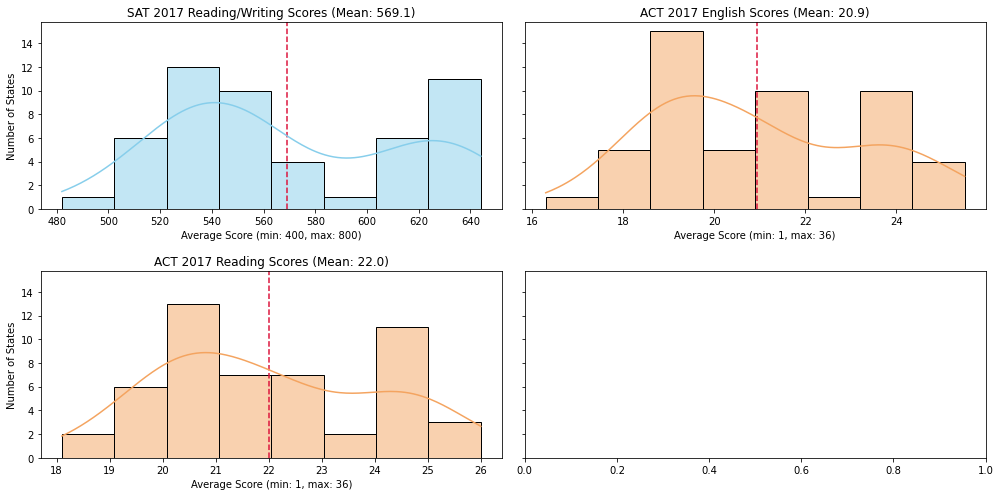

In [83]:
subplot_histograms(final, 
                   ['sat_2017_ebrw',
                    'act_2017_english', 'act_2017_reading'],
                   ['SAT 2017 Reading/Writing Scores',
                    'ACT 2017 English Scores', 'ACT 2017 Reading Scores'],
                   ['Average Score (min: 400, max: 800)', 
                    'Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)'], kde=True)



ACT reading scores from 2017 are relatively seem to be more normally distributed than SAT Reading/Writing scores. ACT English scores from 2017 have a similar mean to the ACT Reading scores. 

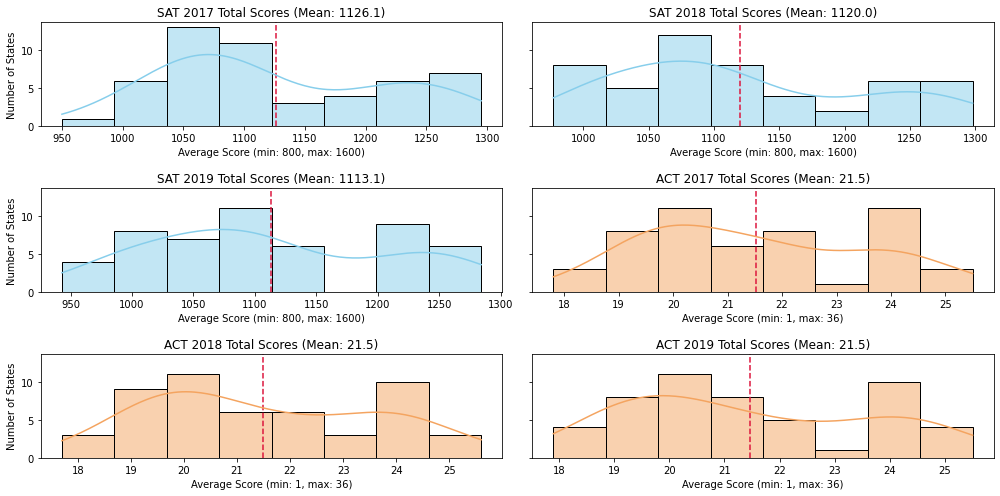

In [84]:
subplot_histograms(final, 
                   ['sat_2017_total', 'sat_2018_total', 'sat_2019_total', 'act_2017_total', 'act_2018_total', 'act_2019_total'],
                   ['SAT 2017 Total Scores', 'SAT 2018 Total Scores', 'SAT 2019 Total Scores', 
                    'ACT 2017 Total Scores', 'ACT 2018 Total Scores', 'ACT 2019 Total Scores'],
                   ['Average Score (min: 800, max: 1600)', 'Average Score (min: 800, max: 1600)',
                    'Average Score (min: 800, max: 1600)',
                    'Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)', 'Average Score (min: 1, max: 36)'], kde=True)

The average total score for the SAT dropped by 6.1 points in 2018 and a further 6.9 points in 2019. On the other hand, ACT average total scores reamined the same through the 3 years.


In [85]:
# Function for plotting single scatter plots
def plot_scatter(df, x, y, title):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(title)
    sns.regplot(data=df, x=x, y=y)
    plt.tight_layout()

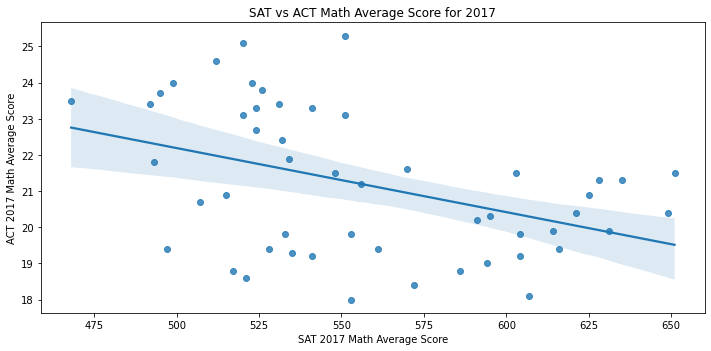

In [86]:
plot_scatter(final, 'sat_2017_math', 'act_2017_math', 'SAT vs ACT Math Average Score for 2017')
plt.xlabel('SAT 2017 Math Average Score')
plt.ylabel('ACT 2017 Math Average Score');

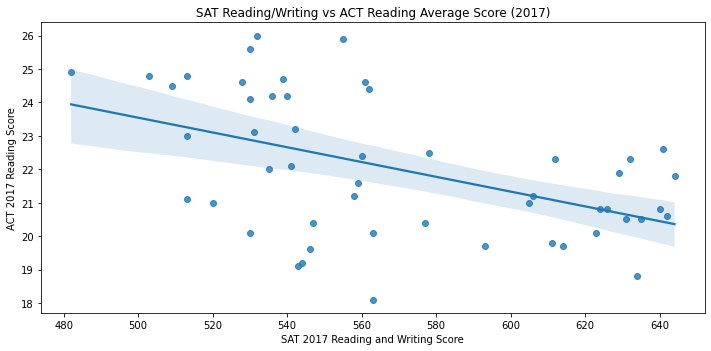

In [87]:
plot_scatter(final, 'sat_2017_ebrw', 'act_2017_reading', 'SAT Reading/Writing vs ACT Reading Average Score (2017)')
plt.xlabel('SAT 2017 Reading and Writing Score')
plt.ylabel('ACT 2017 Reading Score');

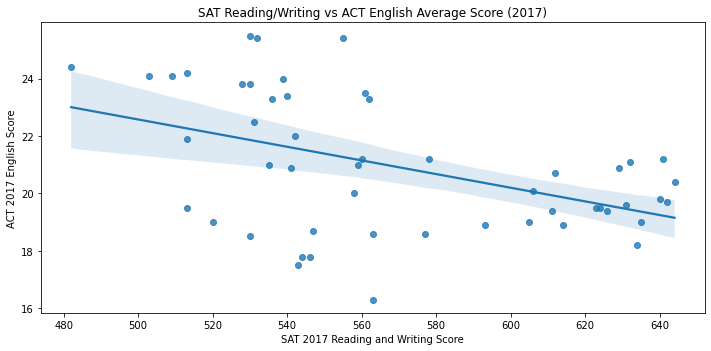

In [88]:
plot_scatter(final, 'sat_2017_ebrw', 'act_2017_english', 'SAT Reading/Writing vs ACT English Average Score (2017)')
plt.xlabel('SAT 2017 Reading and Writing Score')
plt.ylabel('ACT 2017 English Score');

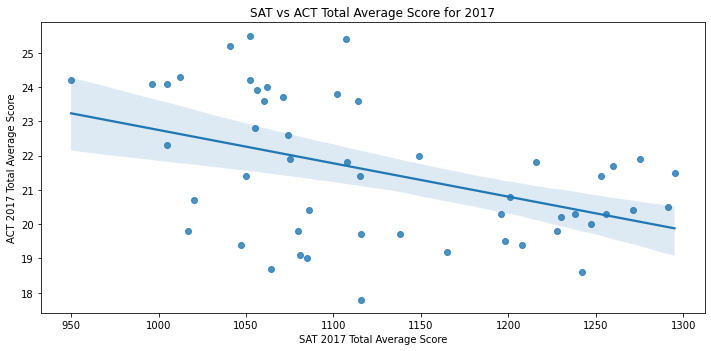

In [89]:
plot_scatter(final, 'sat_2017_total', 'act_2017_total', 'SAT vs ACT Total Average Score for 2017')
plt.xlabel('SAT 2017 Total Average Score')
plt.ylabel('ACT 2017 Total Average Score');

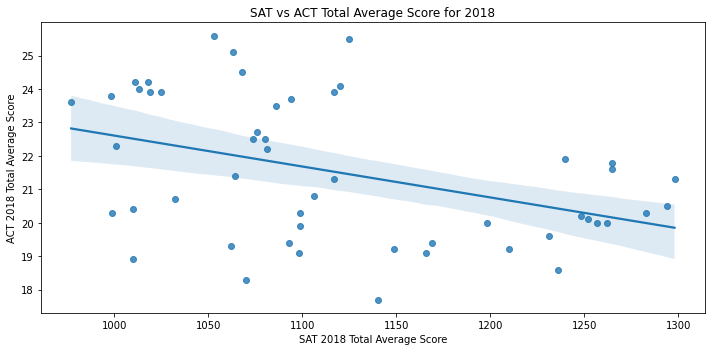

In [90]:
plot_scatter(final, 'sat_2018_total', 'act_2018_total', 'SAT vs ACT Total Average Score for 2018')
plt.xlabel('SAT 2018 Total Average Score')
plt.ylabel('ACT 2018 Total Average Score');

Generally, **ACT and SAT scores are negatively correlated to each other**. This suggests that states tend to focus on one test over the other, meaning that states are likely to have either high SAT/ low ACT or low SAT/ high SAT average scores. In other words, **states with low SAT scores tend to have high ACT scores and vice versa.**

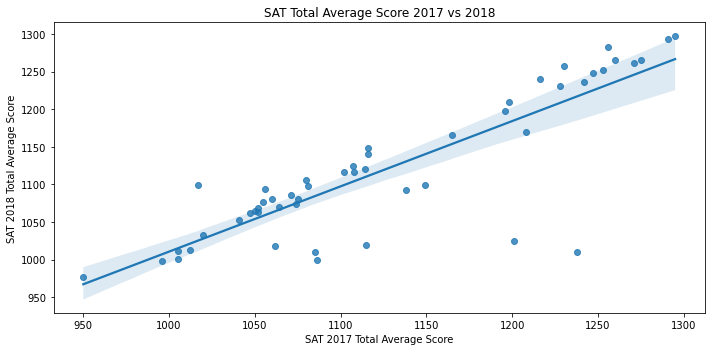

In [91]:
plot_scatter(final, 'sat_2017_total', 'sat_2018_total', 'SAT Total Average Score 2017 vs 2018')
plt.xlabel('SAT 2017 Total Average Score')
plt.ylabel('SAT 2018 Total Average Score');

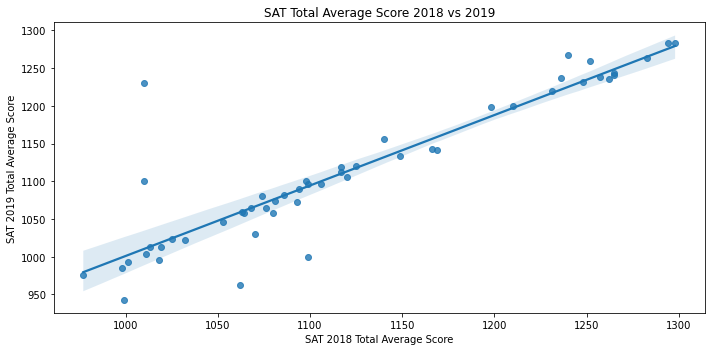

In [92]:
plot_scatter(final, 'sat_2018_total', 'sat_2019_total', 'SAT Total Average Score 2018 vs 2019')
plt.xlabel('SAT 2018 Total Average Score')
plt.ylabel('SAT 2019 Total Average Score');

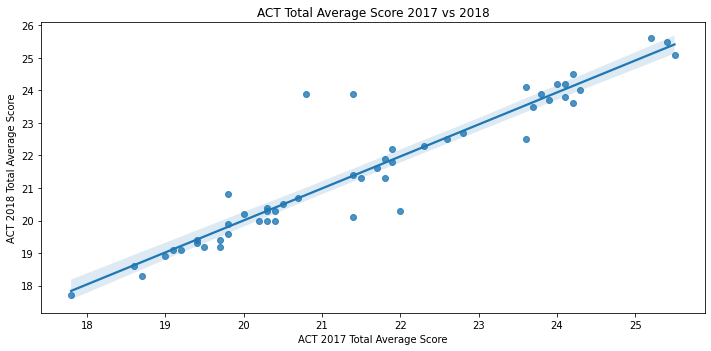

In [93]:
plot_scatter(final, 'act_2017_total', 'act_2018_total', 'ACT Total Average Score 2017 vs 2018')
plt.xlabel('ACT 2017 Total Average Score')
plt.ylabel('ACT 2018 Total Average Score');

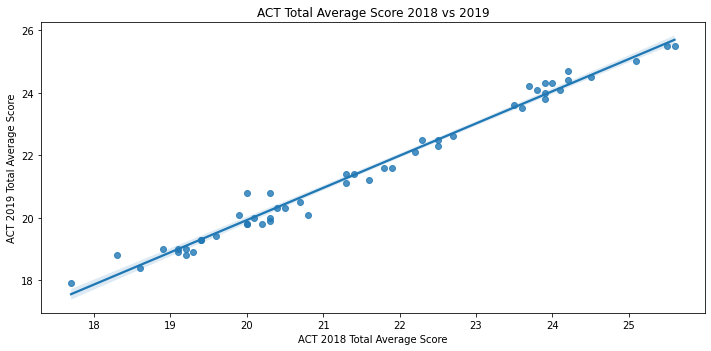

In [94]:
plot_scatter(final, 'act_2018_total', 'act_2019_total', 'ACT Total Average Score 2018 vs 2019')
plt.xlabel('ACT 2018 Total Average Score')
plt.ylabel('ACT 2019 Total Average Score');

ACT and SAT test results year by year have a very strong correlation. **This means that states that did well in the last year are likely to do well in the next year.** This correlation is much stronger for the ACT test, meaning that ACT scores tend to remain static from one year to the next. This could actually be an incentive for high-scoring states to stay with the ACT, given that scores seem to less from one year to the next as compared to the SAT.

#### Plot and interpret boxplots

In [95]:
def plot_box(dataframe, list_of_columns, title, list_of_yticklabels, xlabel, test_type=False, palette='tab10', orient='h'):
    plt.figure(figsize=(14,7))
    plt.title(title)
    
    ax = sns.boxplot(data=dataframe[list_of_columns],palette=palette, orient=orient)
    
    #For setting colors according to standardize colors according to test type (SAT = blue, ACT = orange)
    for i, col in enumerate(list_of_columns):
        if test_type:
                box = ax.artists[i]
                if 'act_' in col:
                        box.set_facecolor('sandybrown')

                elif 'sat_' in col:
                    box.set_facecolor('skyblue')
        
    ax.set_yticklabels(list_of_yticklabels)
    ax.set_xlabel(xlabel)


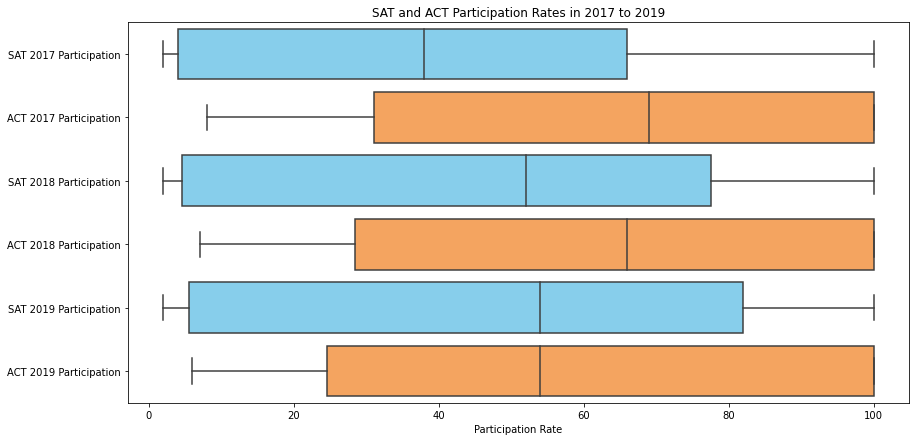

In [104]:
plot_box(final, ['sat_2017_rate', 'act_2017_rate', 'sat_2018_rate', 'act_2018_rate', 'sat_2019_rate', 'act_2019_rate'],
         'SAT and ACT Participation Rates in 2017 to 2019', 
         ['SAT 2017 Participation', 'ACT 2017 Participation', 'SAT 2018 Participation', 'ACT 2018 Participation', 'SAT 2019 Participation', 'ACT 2019 Participation'], 
         'Participation Rate', test_type=True)

The ACT test has a higher median than the SAT test, indicating that the **ACT participation rates are generally higher than SAT participation rates.** The only exception was in 2019 where the median was the same.

The ACT participation rates are also skewed right, suggesting that **there is strong support for the ACT test throughout the US**. SAT participation rates are generally skewed left.

However, from 2017 to 2018, we can observe that the median for SAT participation has been increasing, while the median for ACT participation median dropped. Variance (as measured by the Interquartile range) also seems to have risen, leading to a decrease in skewness. **This could suggest that support for the SAT test is beginning to rise throughout the US**.

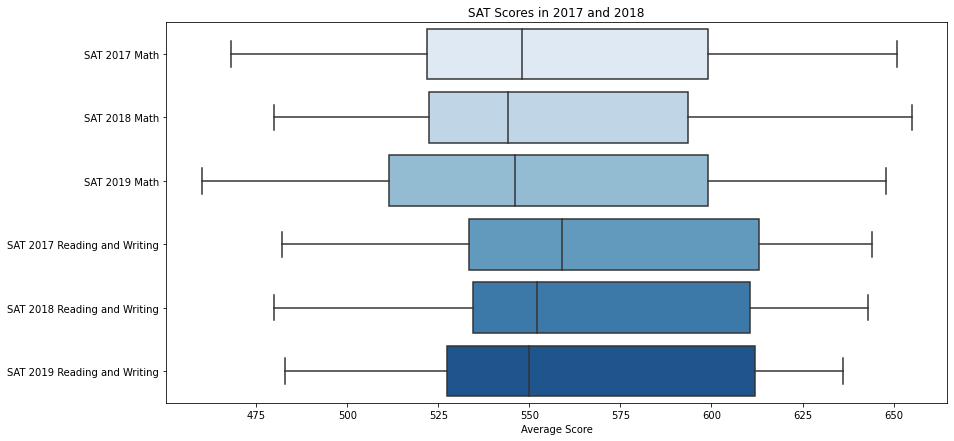

In [97]:
plot_box(final, ['sat_2017_math', 'sat_2018_math', 'sat_2019_math', 'sat_2017_ebrw', 'sat_2018_ebrw', 'sat_2019_ebrw'], 
         'SAT Scores in 2017 and 2018',
         ['SAT 2017 Math', 'SAT 2018 Math', 'SAT 2019 Math', 'SAT 2017 Reading and Writing', 'SAT 2018 Reading and Writing', 'SAT 2019 Reading and Writing'],
         'Average Score', palette='Blues')

The median for SAT test scores decreased for both Math and Reading and Writing in 2018. This could be due to increased SAT participation rates as previously mentioned. Another contributing factor to this could be states that switched to the SAT from the ACT, like Colorado and Illinois which had below total average scores of 1025 and 1029 respectively.

However, it is to be noted that even though there was a decrease, the median still hovered arounf the average score of 550 for both subjects over the 3 years. 

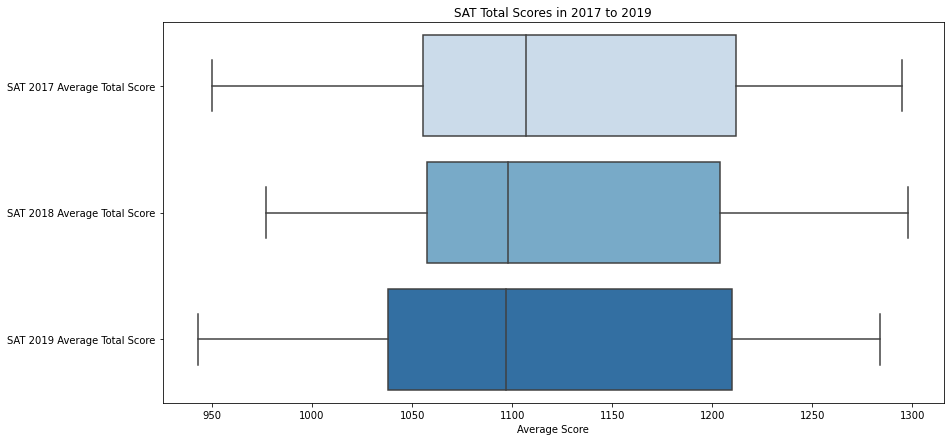

In [98]:
plot_box(final, ['sat_2017_total', 'sat_2018_total', 'sat_2019_total'], 
         'SAT Total Scores in 2017 to 2019', 
         ['SAT 2017 Average Total Score', 'SAT 2018 Average Total Score', 'SAT 2019 Average Total Score'], 'Average Score', palette='Blues')

The median for SAT average total scores also decreased from 1107 to 1098 in 2018 and 1097 in 2019 -- this could be due to both increased participation rates and reports of more students than ever taking the SAT which will likely reduce the median of the test scores. 

This increase in test takers likely came from [students from low-income families or from families “with no history of college attendance"](https://www.orlandosentinel.com/news/education/os-ne-sat-scores-florida-20190924-2ycpuogc2ndkrkwzdrkrjgrg64-story.html). The introduction of [SAT test fee waivers for low income students](https://www.edweek.org/teaching-learning/sat-scores-rise-as-number-of-test-takers-tops-2-million/2018/10) also occurred in 2018 which coincides with the increase in SAT participation and slightly lower median values for 2018 and the subsequent 2019. 



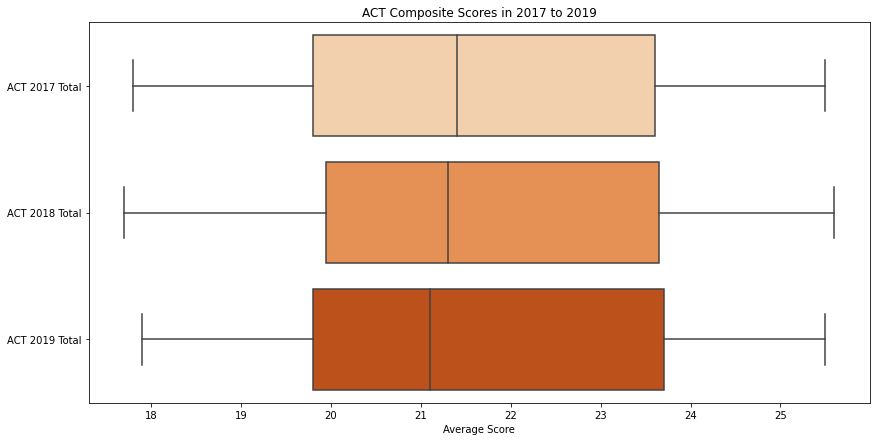

In [99]:
plot_box(final, ['act_2017_total', 'act_2018_total', 'act_2019_total'], 
         'ACT Composite Scores in 2017 to 2019', ['ACT 2017 Total', 'ACT 2018 Total', 'ACT 2019 Total'], 'Average Score', palette='Oranges')


The median for all ACT subjects had a less significant decrease from 2017 to 2018 and subsequently to 2019 with a decrease of only 0.1 and 0.2 points respectively. The boxplot for the ACT data suggests that the scores for ACT are more consistent which is consistent with the earlier scatter plot results which showed very strong correlation between the year on year ACT scores. 

In [100]:
def subplot_kde_2(dataframe, list_of_columns, titles, labels, xlabel):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,5))
    ax = ax.ravel()

    for i, column in enumerate(list_of_columns):
        if 'sat_' in column:
            j = 0
        
        if 'act_' in column:
            j = 1
            
        sns.kdeplot(data=dataframe, x=list_of_columns[i], ax=ax[j], linewidth=2.5, palette='coolwarm')
        ax[j].legend(labels=labels)
        ax[j].set_title(titles[j], fontsize=14)
        ax[j].set_xlabel(xlabel)
        ax[j].set_yticks([])
        plt.tight_layout()

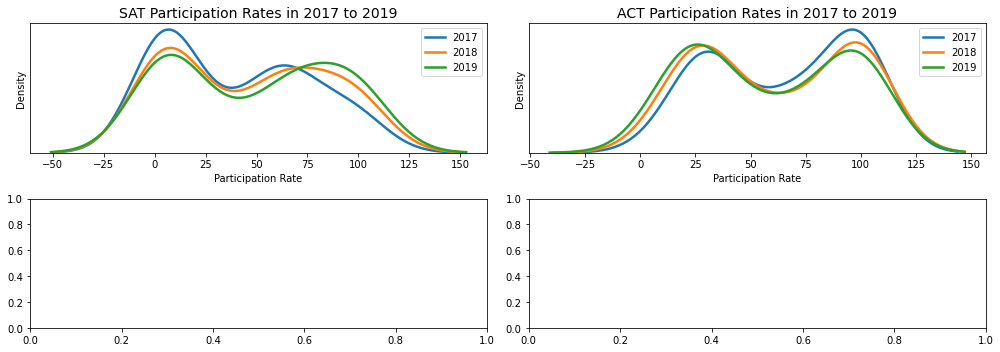

In [101]:
subplot_kde_2(final, ['sat_2017_rate', 'act_2017_rate', 'sat_2018_rate', 'act_2018_rate', 'sat_2019_rate', 'act_2019_rate'], 
                   ['SAT Participation Rates in 2017 to 2019', 'ACT Participation Rates in 2017 to 2019'],
                   ['2017', '2018', '2019'],
                   'Participation Rate')

In [102]:
#participation rate statistics
final[['sat_2017_rate','sat_2018_rate','sat_2019_rate','act_2017_rate','act_2018_rate','act_2019_rate']].describe()

,sat_2017_rate,sat_2018_rate,sat_2019_rate,act_2017_rate,act_2018_rate,act_2019_rate
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,45.745098,49.058824,65.254902,61.725490,58.666667
std,35.276632,37.314256,38.747600,32.140842,34.037085,34.515890
min,2.000000,2.000000,2.000000,8.000000,7.000000,6.000000
25%,4.000000,4.500000,5.500000,31.000000,28.500000,24.500000
50%,38.000000,52.000000,54.000000,69.000000,66.000000,54.000000
75%,66.000000,77.500000,82.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### SAT/ACT PARTICIPATION RATES

Central tendency:
- SAT: 
    - Mean increased from 39.8 to 45.7 to 49.1 over the 3 years 
    - Median increased from 38 to 52 to 54. 
    - Accordingly, we can see that the central tendency shifted significantly to the right in 2018. 
    - We can also see that the central tendency for 2018 and 2019 are v similar which is inline with the minor increase from 2018-2019.
- ACT: 
    - Mean decreased from 65.3 to 61.7 to 58.7
    - Median decreased from 69 to 66 to 54. 
    - Accordingly, we can see that the central tendency shifted slightly to the left in 2018 and then further in 2019. 

Spread:
- SAT: Standard deviation increased from 35.3 to 37.3 then to 38.7.
- ACT: Standard deviation increased from 32.1 to 34.1 then slightly to 34.5. 
- Both the SAT and ACT have a high variance to the interquartile range (e.g in 2017: stretching from 4% to 66% for the SAT and 31% to 100% for the ACT).

Shape/skewness:
- SAT: Bimodal, skewed slightly right.
- ACT: Slightly more bimodal, no observable skew.

#### Distributions in the data
In this dataset, each data represents a sample from a population.
For example, for ACT math test:

- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers)
- Sample: the state means of ACT math test. We have 51 samples

##### According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

No -- we have consistently observed a bimodal distribution throughout our analysis of SAT and ACT scores. This is because our sample **does not satisfy the randomization condition of the Central Limit Theroem** i.e. the states used for our analysis were not selected randomly, due to external factors such state legislation or contracts with schools etc. Additionally, even if we were to use a random sample of states, this would probably not satisfy the sample size assumption, given the strong bimodality/ lack of symmetry when comparing test scores between states.

To get a normal distribution, we would have to resample our data based on the population of students taking the test, irregardless of state. We would probably also want a much larger sample size, given the assymetry observed between different states.

As our overall sample is flawed, Math and Reading will also reflect some degree of skewness and bimodality. Participation rates are actually more bimodal than Math/Reading, as the variable does not meet the **independence assumption** of the Central Limit Theorem. We observed earlier that states with a high SAT participation rate have a low ACT participation rate and vice versa, meaning that the data will not be normally distributed.

This means that when using the average score to compare states, we would see the typical state in the 'higher-performing' group as abnormally far ahead in terms of test scores, and vice versa for the 'lower-performing' group.

As the distribution of our sample does not approximate a normal distribution, we should avoid using characteristics of the normal distribution to make inferences about a normally-distributed population based on our data.



### Outside Research
Participation rates in the SAT and ACT are largely determined by state education policy. The largest jumps in SAT and ACT participation in 2018 were due to states like [Colorado switching from the SAT and ACT](https://www.coloradoindependent.com/2017/07/06/from-csap-to-parcc-heres-how-colorados-standardized-tests-have-changed-and-whats-next/), leading to a massive jump in their SAT participation rate from 11% to 100%. Accordingly, ACT participation rates dropped from 100% to 30%. Illinois also had a similar jump, from 9% in 2017 to 99% in 2018, due to the state [switching to the SAT in 2018](https://chicago.chalkbeat.org/2018/7/27/21105418/illinois-has-embraced-the-sat-and-the-act-is-mad-about-it).

Hawaii is particularly interesting as the state is unique in terms of its location and demographics. The majority of Hawaiians live in urban areas, which seems to be contrary to the trend of urban states favoring the SAT test. One of the reasons behind high SAT and ACT participation rates could be due to Hawaii's strong testing culture, which can be traced back to the federal 'No Child Left Behind' law, when Hawaii won a $75 million Race to the Top grant that [established performance outcomes tied to test scores](https://www.civilbeat.org/2018/04/hawaii-teachers-think-your-kids-are-taking-way-too-many-tests/). This suggests that schools are pushing for standardized testing beyond the norm. The ACT participation rate is greater than the SAT participation rate as public schools started made the [ACT mandatory for all Hawaii public school juniors starting from 2014](https://www.hawaiinewsnow.com/story/32835151/hawaii-students-perform-better-on-act-but-scores-still-lag-behind-nation/).

A common trend in states with above 50% participation for both the SAT and ACT has been the rise of a [counter-movement against standardized testing](https://www.edweek.org/teaching-learning/what-happens-when-states-un-standardize-tests/2018/10) in general. States like [Georgia](https://www.edweek.org/education/four-states-want-in-on-second-round-of-essas-innovative-assessment-pilot/2018/10?cmp=soc-edit-tw) signed on to the Innovative Assessment pilot launched by the US government in 2018, which is a programme that intends to use different assessment methods as an alternative to traditional standardized tests. [Hawaii and South Carolina](http://blogs.edweek.org/edweek/campaign-k-12/2018/10/essa-innovation-testing-georgia-kansas-south-carolina-hawaii.html) have also signalled interest in the program.

The high ACT/SAT participation rates in Florida is likely due to the [mandatory Florida Statewide Assessments (FSA)](http://www.flvs.net/student-resources/full-time/statewide-assessment-testing#:~:text=Florida%20Statewide%20Assessment%20Program,achievement%20of%20the%20Florida%20Standards). This means that students who want to apply to out of state universities still need to take the SAT and ACT. While some school officials have tried to push for the adoption of the SAT or ACT over local assessments and reduce standardized testing in general, the state has argued that the [ACT and SAT is unable to replace the FSA](http://www.fldoe.org/core/fileparse.php/5663/urlt/ACTSATFSA.pdf). There continues to be further pushback against standardized testing in Florida.



## Conclusions and Recommendations

From the data, we know that states with a higher ACT participation rate tend to get lower ACT scores on average. The opposite is true for states that take the SAT. This could make a compelling argument for states that are looking to improve their position on the National Assessment of Educational Progress ([NAEP](https://www.ets.org/k12/assessments/federal/naep/?WT.ac=k12_36148_overwrite_naep_170105)).

Given that North Carolina falls into the above group (higher ACT participation and below average ACT scores) and has not yet committed to the Innovative Assessment pilot, I **recommend that the College Board work with North Carolina to work with to raise SAT participation rates**.

However, the College Board must take into account the growing movement against standardized testing. Instead of trying to pile on additional tests, the College Board must partner states in their effort to reduce over-testing and market the SAT as a tool to help with this process.

Beyond just signing a contract with a state, the College Board should also look to incorporate other forms of testing such as portfolio-based assessment or adaptive testing.

With COVID-19 heavily affecting standardized testing throughout the United States and further pushing states to consider the alternative means of assessment, the College Board must continue to adapt the SAT to fit the times that we are now in.

